# Завантаження та підготовка даних

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Завантаження даних
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Підготовка даних
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Перетворення міток на категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Побудова моделі

In [ ]:
model = Sequential()

# Перший згортковий шар
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Другий згортковий шар
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Третій згортковий шар
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Перетворення вектора ознак в плоский вектор
model.add(Flatten())

# # Повнозв'язний шар
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Регуляризація за допомогою Dropout

# Вихідний шар
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='RMSprop ', loss='categorical_crossentropy', metrics=['accuracy'])



# Навчання моделі

In [ ]:
# Визначення колбеків
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Навчання моделі
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
422/422 [==============================] - 52s 122ms/step - loss: 0.4376 - accuracy: 0.8421 - val_loss: 0.4278 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/50
422/422 [==============================] - 48s 113ms/step - loss: 0.3917 - accuracy: 0.8582 - val_loss: 0.3630 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 3/50
422/422 [==============================] - 51s 120ms/step - loss: 0.3546 - accuracy: 0.8728 - val_loss: 0.3177 - val_accuracy: 0.8799 - lr: 0.0010
Epoch 4/50
422/422 [==============================] - 53s 125ms/step - loss: 0.3281 - accuracy: 0.8808 - val_loss: 0.3023 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 5/50
422/422 [==============================] - 57s 136ms/step - loss: 0.3076 - accuracy: 0.8882 - val_loss: 0.2889 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 6/50
422/422 [==============================] - 48s 115ms/step - loss: 0.2887 - accuracy: 0.8956 - val_loss: 0.3022 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 7/50
422/422 [==============================] 

# Оцінка результатів

313/313 [==============================] - 3s 9ms/step - loss: 0.3485 - accuracy: 0.8961
Test accuracy: 0.8961


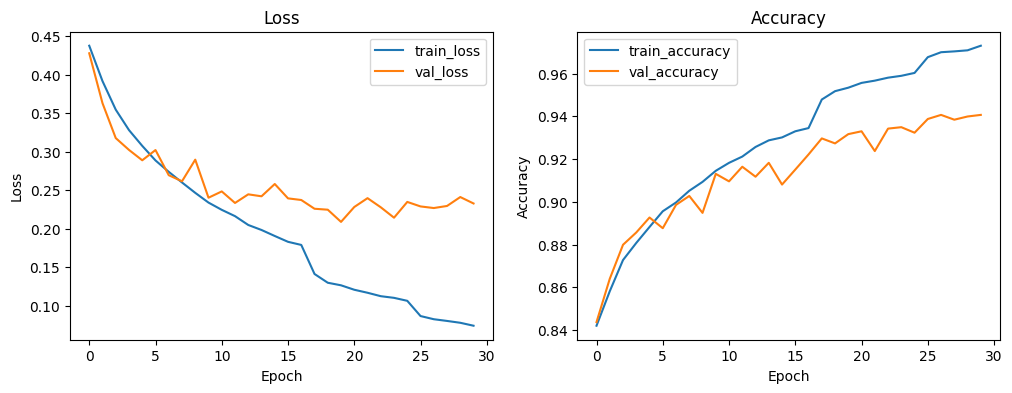

In [ ]:
# Оцінка моделі на тестових даних
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Візуалізація історії навчання
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Точність отриманої згорткової мережі вища за точність багатошарової мережі з попереднього завдання.

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 1, 1, 128)       

# Завдання 2

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


# Завантаження даних

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


# Попередня обробка даних

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train_rgb = np.repeat(X_train, 3, axis=3)
X_test_rgb = np.repeat(X_test, 3, axis=3)

X_train_resized = np.pad(X_train_rgb, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
X_test_resized = np.pad(X_test_rgb, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Завантаження базової моделі VGG16 без верхніх шарів

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

58889256/58889256 [==============================] - 4s 0us/step


# Додавання власних шарів для класифікації

In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Створення повної моделі

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)

# Заморожування шарів базової моделі

In [11]:
for layer in base_model.layers:
    layer.trainable = False

# Компіляція моделі

In [12]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Визначення колбеків

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Навчання моделі

In [14]:
history = model.fit(
    X_train_resized, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
750/750 [==============================] - 16s 14ms/step - loss: 1.0887 - accuracy: 0.6405 - val_loss: 0.6819 - val_accuracy: 0.7695 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 9s 12ms/step - loss: 0.6656 - accuracy: 0.7679 - val_loss: 0.5819 - val_accuracy: 0.7942 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 10s 14ms/step - loss: 0.5870 - accuracy: 0.7922 - val_loss: 0.5319 - val_accuracy: 0.8084 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 10s 14ms/step - loss: 0.5409 - accuracy: 0.8063 - val_loss: 0.5010 - val_accuracy: 0.8186 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 10s 14ms/step - loss: 0.5082 - accuracy: 0.8177 - val_loss: 0.4794 - val_accuracy: 0.8270 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 9s 13ms/step - loss: 0.4847 - accuracy: 0.8258 - val_loss: 0.4619 - val_accuracy: 0.8332 - lr: 1.0000e-04
Epoch 7/50
750/750 [================

# Оцінка моделі на тестових даних

In [15]:
test_loss, test_acc = model.evaluate(X_test_resized, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 3s 10ms/step - loss: 0.3383 - accuracy: 0.8810
Test accuracy: 0.8810


# точність моделі нижча ніж в попередніх моделей

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   